### Os dados utilizados neste trabalho foram fornecidos por [Sajid - dbdmobile](https://www.kaggle.com/datasets/dbdmobile/myanimelist-dataset)
#### Rótulos de Conteúdo (Traduzidos do Inglês):

- `anime_id`: Identificação única para cada anime.

- `Name`: O nome do anime em seu idioma original.

- `English name`: O nome em inglês do anime.

- `Other name`: Nome nativo ou título do anime (pode estar em japonês, chinês ou coreano).

- `Score`: A pontuação ou classificação atribuída ao anime.

- `Genres`: Os gêneros do anime, separados por vírgulas.

- `Synopsis`: Uma breve descrição ou resumo do enredo do anime.

- `Type`: O tipo de anime (por exemplo, série de TV, filme, OVA, etc.).

- `Episodes`: O número de episódios no anime.

- `Aired`: As datas em que o anime foi ao ar.

- `Premiered`: A temporada e o ano em que o anime estreou.

- `Status`: O status do anime (por exemplo, Finalizado, Atualmente em exibição, etc.).

- `Producers`: As empresas de produção ou produtores do anime.

- `Licensors`: Os licenciadores do anime (por exemplo, plataformas de streaming).

- `Studios`: Os estúdios de animação que trabalharam no anime.

- `Source`: O material de origem do anime (por exemplo, mangá, light novel, original).

- `Duration`: A duração de cada episódio.

- `Rating`: A classificação etária do anime.

- `Rank`: A posição do anime com base em popularidade ou outros critérios.

- `Popularity`: A classificação de popularidade do anime.

- `Favorites`: O número de vezes que o anime foi marcado como favorito pelos usuários.

- `Scored By`: O número de usuários que deram uma pontuação ao anime.

- `Members`: O número de membros que adicionaram o anime à sua lista na plataforma.

- `Image URL`: A URL da imagem ou poster do anime.


### Importando as bibliotecas e fazendo as configurações

In [333]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

# Usando uma paleta predefinida
sns.set_palette("pastel6")
warnings.filterwarnings('ignore')
%matplotlib inline

### Extraindo os dados e começando a análise

In [334]:
path = "../data/anime-dataset-2023.csv"
df = pd.read_csv(path)
df.sample(2)

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
23555,53729,We Are PAC-MAN!,UNKNOWN,We are PAC-MAN!,UNKNOWN,UNKNOWN,An original music video produced by Bandai Nam...,Music,1.0,"May 23, 2022",...,UNKNOWN,Game,3 min,G - All Ages,UNKNOWN,19899,0,UNKNOWN,140,https://cdn.myanimelist.net/images/anime/1720/...
24623,55390,Children Record (Re:boot),Children Record (Re:boot),チルドレンレコード(Re:boot),UNKNOWN,UNKNOWN,For the 10th anniversary of the Kagerou Projec...,Music,1.0,"Apr 1, 2021",...,UNKNOWN,Other,3 min,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1983/...


In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   anime_id      24905 non-null  int64 
 1   Name          24905 non-null  object
 2   English name  24905 non-null  object
 3   Other name    24905 non-null  object
 4   Score         24905 non-null  object
 5   Genres        24905 non-null  object
 6   Synopsis      24905 non-null  object
 7   Type          24905 non-null  object
 8   Episodes      24905 non-null  object
 9   Aired         24905 non-null  object
 10  Premiered     24905 non-null  object
 11  Status        24905 non-null  object
 12  Producers     24905 non-null  object
 13  Licensors     24905 non-null  object
 14  Studios       24905 non-null  object
 15  Source        24905 non-null  object
 16  Duration      24905 non-null  object
 17  Rating        24905 non-null  object
 18  Rank          24905 non-null  object
 19  Popu

#### Removendo as colunas sem utilidades para a análise

Colunas que representam duração, premiação, imagem e etc...

In [336]:
col_drop = ['Image URL', 'Members', 'Duration', 'Licensors', 'Producers', 'Status', 'Premiered', 'Synopsis', 'Other name', 'English name', 'Aired'] 
df = df.drop(columns=col_drop)

#### Excluindo os valores nulos

1. Trocando os valores `'UNKNOWN'` para o `np.nan` do Numpy 

2. Iremos remover os valores nulos, pois, estão espalhados em diversas features que representam opiniões ou são algo categórico

In [337]:
cols = df.columns

for c in cols:
    df[c] = df[c].replace('UNKNOWN', np.nan)

df = df.dropna()
print(df.shape)

(9992, 13)


In [338]:
df.sample(3)

,anime_id,Name,Score,Genres,Type,Episodes,Studios,Source,Rating,Rank,Popularity,Favorites,Scored By
6490,11241,Brave 10,6.75,"Action, Adventure",TV,12.0,TMS Entertainment,Manga,R - 17+ (violence & profanity),5071.0,1464,246,69572.0
205,229,Ninin ga Shinobuden,6.89,Comedy,TV,12.0,ufotable,Manga,R - 17+ (violence & profanity),4449.0,3565,128,15854.0
9638,27927,Urawa no Usagi-chan,5.37,Comedy,TV,12.0,A-Real,Original,PG - Children,11177.0,4895,8,6286.0


- Podemos converter de antemão as features para seus respectivos tipos

In [339]:
df['Score'] = df['Score'].astype('float') 
df['Scored By'] = df['Scored By'].astype('float') 
df['Episodes'] = df['Episodes'].astype('float')
df['Rank'] = df['Rank'].astype('float')
df['Genres'] = df['Genres'].astype('str')
df['Type'] = df['Type'].astype('str')
df['Source'] = df['Source'].astype('str')

- Checando novamente as informações da colunas

In [340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9992 entries, 0 to 24590
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   anime_id    9992 non-null   int64  
 1   Name        9992 non-null   object 
 2   Score       9992 non-null   float64
 3   Genres      9992 non-null   object 
 4   Type        9992 non-null   object 
 5   Episodes    9992 non-null   float64
 6   Studios     9992 non-null   object 
 7   Source      9992 non-null   object 
 8   Rating      9992 non-null   object 
 9   Rank        9992 non-null   float64
 10  Popularity  9992 non-null   int64  
 11  Favorites   9992 non-null   int64  
 12  Scored By   9992 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 1.1+ MB


- Vamos ter uma visão geral sobre as colunas númericas (arredondando os valores para duas casas decimais)

In [341]:
df.describe().round(2)

,anime_id,Score,Episodes,Rank,Popularity,Favorites,Scored By
count,9992.00,9992.00,9992.00,9992.00,9992.00,9992.00,9992.00
mean,19858.76,6.71,14.26,5466.36,6152.94,1041.05,45894.30
std,16883.37,0.84,42.37,3380.29,4177.80,6528.39,143487.49
min,1.00,1.85,1.00,1.00,1.00,0.00,103.00
25%,3294.25,6.15,1.00,2568.75,2560.75,3.00,973.50
50%,14903.00,6.72,6.00,5232.00,5481.00,20.00,4797.00
75%,35557.50,7.29,13.00,8130.00,9452.25,170.00,27510.25
max,55355.00,9.10,1818.00,12701.00,19191.00,217606.00,2660903.00


### Analisando as features

##### Genre

In [342]:
df["Genres"].value_counts() 

Genres
Comedy                                                       921
Action, Sci-Fi                                               341
Action, Adventure, Fantasy                                   295
Comedy, Slice of Life                                        285
Action                                                       265
                                                            ... 
Adventure, Fantasy, Suspense                                   1
Award Winning, Comedy, Drama, Slice of Life, Supernatural      1
Adventure, Comedy, Fantasy, Supernatural, Ecchi                1
Adventure, Fantasy, Girls Love, Mystery, Ecchi                 1
Fantasy, Sports                                                1
Name: count, Length: 823, dtype: int64

- Resumo geral da feature `"Genres"`, os diversos gêneros estão sendo tratados como uma única string, portando, temos que realizar algumas operações antes de nos aprofundar nisso

In [343]:
# Dicionário para armazenar a contagem de cada gênero
genero_contagem = {}

# Iterar sobre cada linha da coluna 'Genres'
for generos in df['Genres']:
    # Dividir a string de gêneros em uma lista separada por vírgulas
    generos_lista = generos.split(',')
    # Iterar sobre cada gênero na lista
    for genero in generos_lista:
        # Remover espaços em branco extras e converter para minúsculas
        genero = genero.strip().lower()
        genero_contagem[genero] = genero_contagem.get(genero, 0) + 1

# Ordena em ordem decrescente
sorted_genres = sorted(genero_contagem.items(), key=lambda x: x[1], reverse=True)

# Imprime todos os gêneros e sua frequência
for i, (genero, contagem) in enumerate(sorted_genres, start=1):
    print(f'{i} - {genero}: {contagem}')

1 - comedy: 4263
2 - action: 3519
3 - fantasy: 2655
4 - adventure: 2334
5 - sci-fi: 2175
6 - drama: 1903
7 - romance: 1616
8 - supernatural: 1063
9 - slice of life: 930
10 - ecchi: 725
11 - mystery: 687
12 - sports: 489
13 - horror: 333
14 - award winning: 170
15 - suspense: 159
16 - boys love: 98
17 - gourmet: 89
18 - girls love: 83
19 - avant garde: 73



- Plotando os gêneros para melhor visualização dos dados limpos

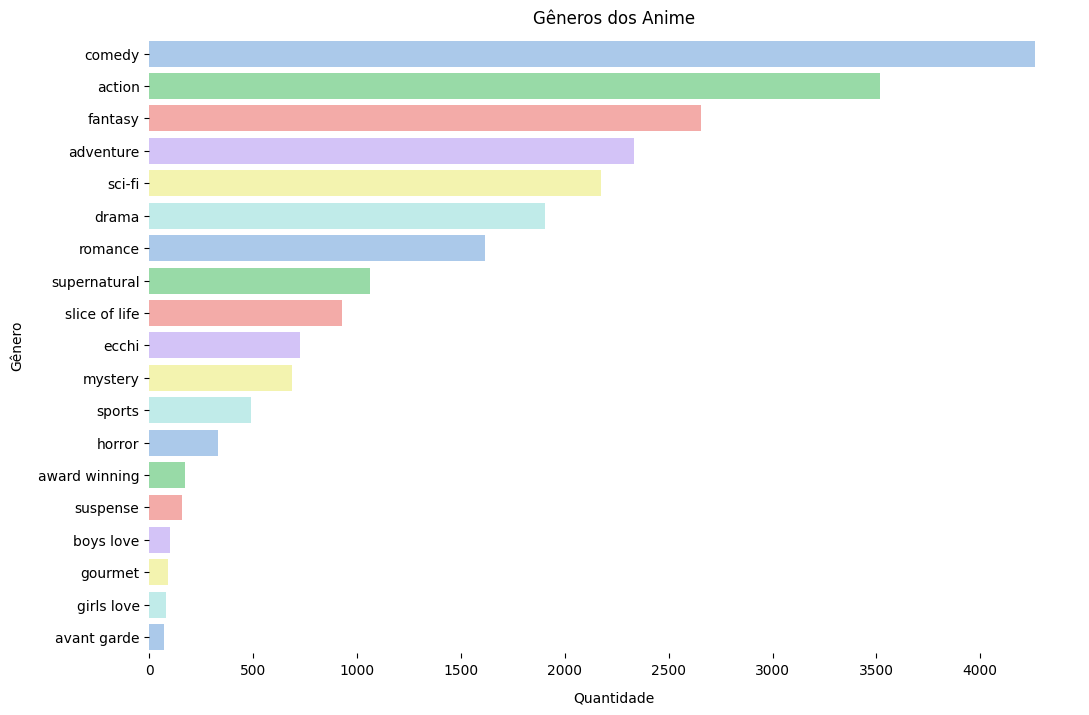

In [344]:
df_genres = pd.DataFrame(sorted_genres, columns=['Genero', 'Contagem'])

f, ax = plt.subplots(figsize=(12, 8))

sns.barplot(x='Contagem', y='Genero', data=df_genres, palette="pastel6")
sns.despine(left=True, bottom=True)

# Rótulos
ax.set_title('Gêneros dos Anime', pad=10)
ax.set_xlabel('Quantidade', labelpad=10)
ax.set_ylabel('Gênero', labelpad=10)

plt.show()

##### Score

Vamos ter uma visão geral sobre `Score`

In [345]:
df['Score'].describe().round(3)

count    9992.000
mean        6.708
std         0.837
min         1.850
25%         6.150
50%         6.720
75%         7.290
max         9.100
Name: Score, dtype: float64

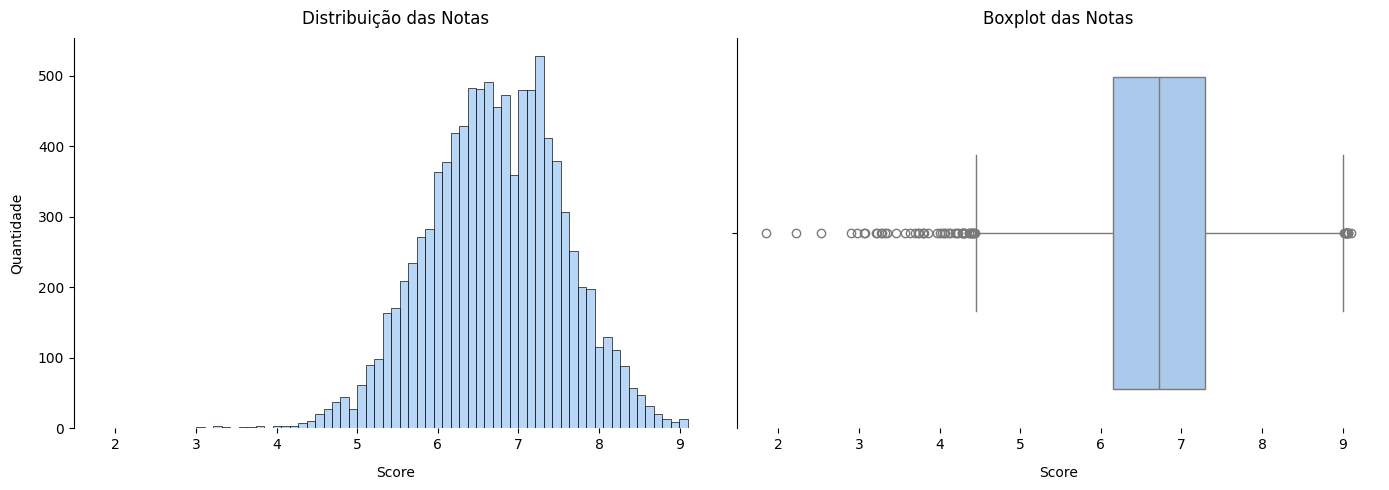

In [346]:
f, ax = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de Barras - lado esquerdo
sns.histplot(data=df, x='Score', ax=ax[0])  
ax[0].set_title('Distribuição das Notas', pad=10)

# Gráfico Boxplot - lado direito
sns.boxplot(data=df, x='Score', ax=ax[1])  
ax[1].set_title('Boxplot das Notas', pad=10)
sns.despine(bottom=True)

# Padding nos rótulos dos eixos x
ax[0].set_xlabel('Score', labelpad=10)
ax[1].set_xlabel('Score', labelpad=10)

# Padding no eixo y
ax[0].set_ylabel('Quantidade', labelpad=10)

# Epaçamentos gráficos
plt.tight_layout()
plt.show()

- Temos uma distribuição que se consentra perto dos 6 a 7 

- No Boxpot podemos ver que exitem bastente outliers para notas menores de 4 e para isso teremos que conferir se existe um motivo

- Vamos ver quantas notas abaixo de 4 temos em nossos dados

In [347]:
low_score = df[df['Score'] < 4.5]['anime_id'].count()
print(f"Total de animes com um score baixo: {low_score}")

Total de animes com um score baixo: 58


In [348]:
df[df['Score'] < 4][['Score', 'Favorites', 'Popularity', 'Rank']].describe().round(2)

,Score,Favorites,Popularity,Rank
count,24.00,24.00,24.00,24.00
mean,3.31,52.21,6740.79,12662.29
std,0.53,88.73,2905.08,24.92
min,1.85,1.00,1206.00,12616.00
25%,3.08,5.75,4848.75,12641.25
50%,3.34,16.50,7370.00,12667.00
75%,3.74,42.25,8415.25,12681.75
max,3.97,295.00,12363.00,12701.00


- Podemos ver que todas as carcacterísticas desses animes são ruins, portando, esses outliers fazem sentido

- Dessa maneira, não é necessário realizar nenhuma operação

##### Type

- Vamos explorar os tipos existentes de animações orientais

- Se houver alguma inconsistência lidaremos com ela

In [349]:
print(df['Type'].unique())

['TV' 'Movie' 'OVA' 'Special' 'ONA']


Temos 6 variedades: 

1. **TV (Televisão)**: Refere-se aos animes produzidos para transmissão na televisão. Eles geralmente têm episódios mais longos e seguem um formato de série.

2. **Movie (Filme)**: Animes feitos para exibição nos cinemas. Eles são muitas vezes produções mais elaboradas e têm uma duração maior do que os episódios de TV.

3. **OVA (Original Video Animation)**: São animes lançados diretamente para o mercado de home video, sem serem exibidos na TV. Eles podem ser histórias complementares, spin-offs ou adaptações de mangás.

4. **Special (Especial)**: Esses são episódios únicos ou especiais de animes que não se encaixam necessariamente na sequência principal da série. Eles podem ser lançados como bônus com DVDs, eventos especiais ou ocasiões comemorativas.

5. **ONA (Original Net Animation)**: Animes produzidos para distribuição online. Eles são lançados em plataformas de streaming ou websites, em vez de serem exibidos na televisão.

6. **Music (Música)**: Neste contexto, refere-se a vídeos musicais baseados em animes, muitas vezes apresentando músicas tema da série ou personagens cantando. Eles podem ser lançados como parte de um DVD ou separadamente para promover a série.


Ver as distribuição dos tipos 

In [350]:
counts = df['Type'].value_counts()
print(counts)

Type
TV         4099
OVA        1583
Special    1583
Movie      1561
ONA        1166
Name: count, dtype: int64


- Plotando em gráfico de barras para ficar mais fácil de visualizar

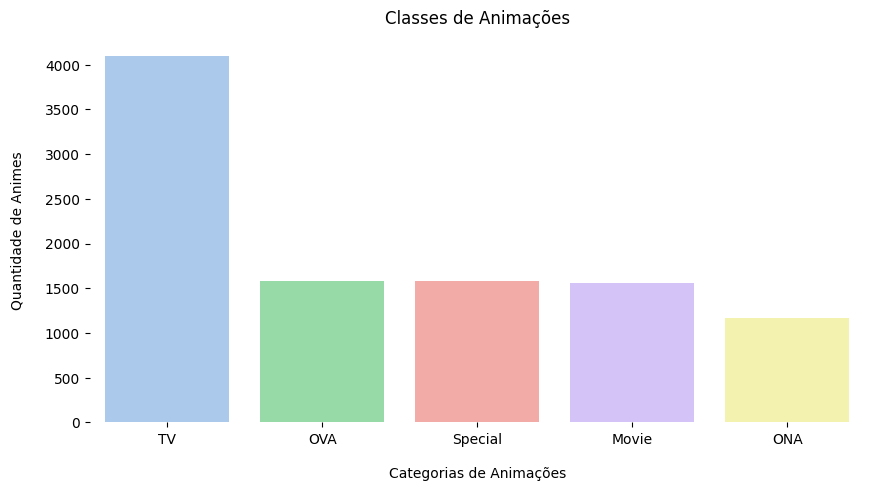

In [368]:
f, ax = plt.subplots(figsize=(10, 5))

sns.barplot(x=counts.index, y=counts.values, palette="pastel6", ax=ax)
sns.despine(left=True, bottom=True)

ax.set_title('Distribuição dos Tipos de Animações', pad=10)

# Rótulos aos eixos
ax.set_ylabel("Quantidade de Animes", labelpad=15)  
ax.set_xlabel("Categorias de Animações", labelpad=15)

plt.show()

##### Episodes

In [352]:
df['Episodes'].describe().round(2)

count    9992.00
mean       14.26
std        42.37
min         1.00
25%         1.00
50%         6.00
75%        13.00
max      1818.00
Name: Episodes, dtype: float64

Vamos ver quais tipos de animes tem mais produções

 - **Meia Temprada** tem torno de 12 a 13 episódios

 - **Temprada Completa** tem torno de 24 a 26 episódios

 - **Anuais** maiores que uma temporada, porém tem quantidade de eps indefinida

 - **Especiais** menos de 10 eps em média, geralmente são eps não canônicos


In [353]:
total = 9992
meia_temporada = df[(df['Episodes'] == 12) | (df['Episodes'] == 13)]
temporada_completa = df[(df['Episodes'] == 24) | (df['Episodes'] == 26)]
anuais = df[df['Episodes'] > 26]
especiais = df[df['Episodes'] <= 10]

print(f"Animes de Meia Temporada: {len(meia_temporada)} -> representa {(len(meia_temporada) / total):.2f}%")
print(f"Animes de Temporada Completa: {len(temporada_completa)} -> representa {(len(temporada_completa) / total):.2f}%")
print(f"Animes Anuais: {len(anuais)} -> representa {(len(anuais) / total):.2f}%")
print(f"Animes de episódios especiais: {len(especiais)} -> representa {(len(especiais) / total):.2f}%")

Animes de Meia Temporada: 2301 -> representa 0.23%
Animes de Temporada Completa: 662 -> representa 0.07%
Animes Anuais: 1035 -> representa 0.10%
Animes de episódios especiais: 5399 -> representa 0.54%


##### Studios

Printando os dados gerais da coluna

In [354]:
print('-' * 50)
print(df['Studios'].describe())
print('-' * 50)
print(df['Studios'].value_counts())
print('-' * 50)

--------------------------------------------------
count               9992
unique              1112
top       Toei Animation
freq                 660
Name: Studios, dtype: object
--------------------------------------------------
Studios
Toei Animation                            660
Sunrise                                   464
J.C.Staff                                 341
Madhouse                                  310
Studio Deen                               260
                                         ... 
G&G Entertainment                           1
Animation 501                               1
Bones, Sunrise                              1
Toei Animation, Marza Animation Planet      1
HMCH, Gravity Well                          1
Name: count, Length: 1112, dtype: int64
--------------------------------------------------


- Temos o mesmo problemas que apareceu em [gênero](####Genre), onde temos 2 ou + studios juntos em uma única string

- Lidaremos com isso da mesma forma

In [355]:
studios = {}

for studio in df['Studios']:
    studios_lista = studio.split(',')
    for studio in studios_lista:
        studio = studio.strip().lower()
        studios[studio] =  studios.get(studio, 0) + 1

studios_series = pd.Series(studios)
studios_series.describe().round(2)

count    724.00
mean      15.06
std       47.04
min        1.00
25%        1.00
50%        3.00
75%        9.00
max      679.00
dtype: float64

- Separandos os estúdios pequenos

In [356]:
peq_studios = studios_series[studios_series <= 35]
peq_studios.sort_values(ascending=False)

hal film maker              35
nomad                       35
yumeta company              35
ruo hong culture            34
a.c.g.t.                    33
                            ..
pollyanna graphics           1
t.p.o                        1
liberty animation studio     1
fuji tv                      1
toho animation studio        1
Length: 659, dtype: int64

- Separandos os estúdios médios

In [357]:
med_studios = studios_series[(studios_series > 35) & (studios_series <= 100)]
print(med_studios.sort_values(ascending=False))
print(f'Length: {len(med_studios)} studios') 

brain's base                  96
dle                           89
group tac                     85
doga kobo                     83
lidenfilms                    80
feel.                         71
zexcs                         68
ufotable                      68
mappa                         68
gainax                        66
wit studio                    66
tokyo movie shinsha           65
gallop                        63
tezuka productions            62
arms                          62
ashi productions              61
studio 4°c                    54
lerche                        54
kinema citrus                 53
p.a. works                    53
haoliners animation league    52
tnk                           52
8bit                          52
aqua aris                     52
diomedéa                      51
studio hibari                 50
magic bus                     50
bandai namco pictures         47
studio comet                  47
ajia-do                       46
white fox 

- Separandos os estúdios grandes

In [358]:
grandes_studios = studios_series[studios_series > 100] 
print(grandes_studios.sort_values(ascending=False)) 
print(f'Length: {len(grandes_studios)} studios')

toei animation          679
sunrise                 478
j.c.staff               364
madhouse                347
production i.g          311
studio deen             279
tms entertainment       276
pierrot                 242
olm                     235
a-1 pictures            213
shin-ei animation       174
nippon animation        170
aic                     157
tatsunoko production    146
bones                   140
xebec                   138
gonzo                   135
shaft                   126
kyoto animation         121
silver link.            109
satelight               101
dtype: int64
Length: 21 studios


- Plotar um Scatterplot para ver os studios

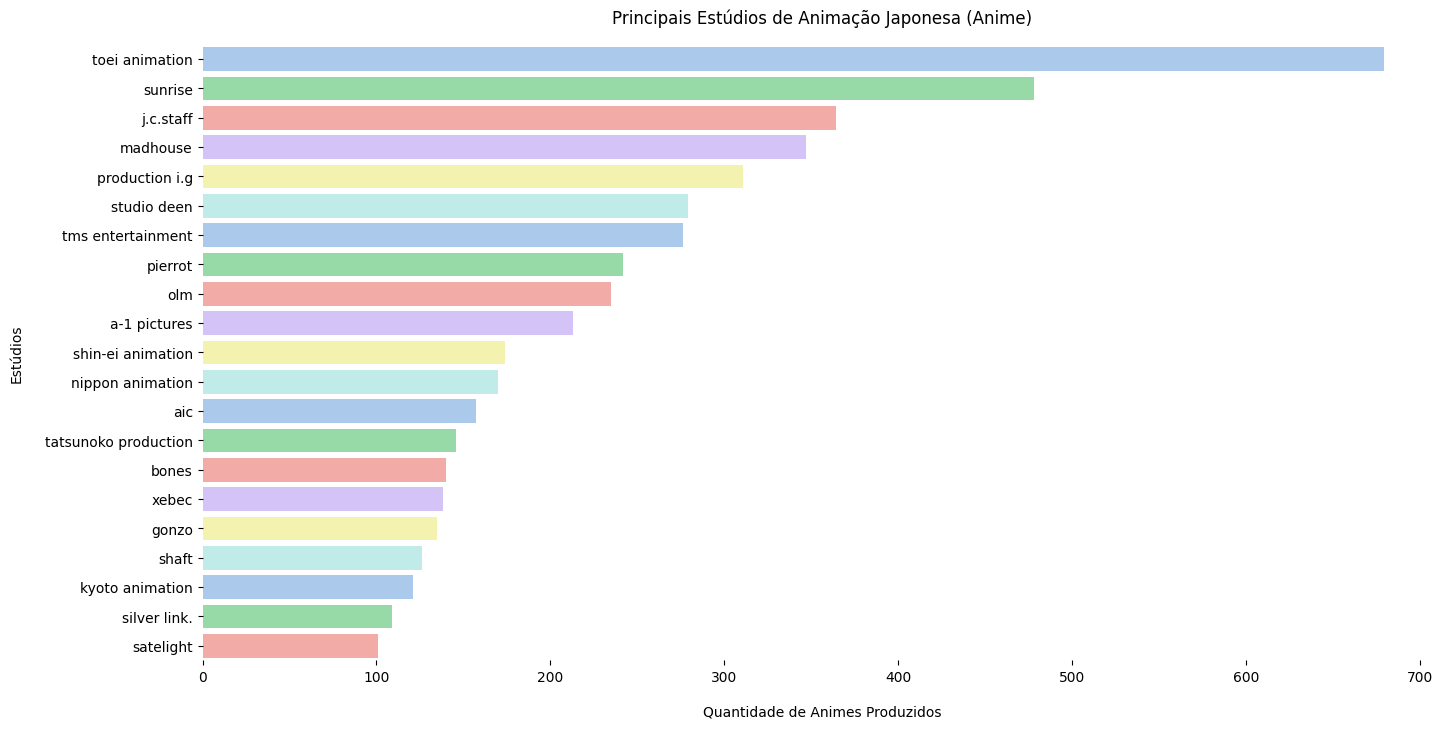

In [365]:
# Ordenar os dados
grandes_studios_sorted = grandes_studios.sort_values(ascending=False)

f, ax = plt.subplots(figsize=(16, 8))
sns.barplot(x=grandes_studios_sorted.values, y=grandes_studios_sorted.index, palette="pastel6", ax=ax)

# Rótulos 
ax.set_title("Principais Estúdios de Animação Japonesa (Anime)", pad=15)
ax.set_ylabel("Estúdios", labelpad=15)  
ax.set_xlabel("Quantidade de Animes Produzidos", labelpad=15)

sns.despine(left=True, bottom=True)
plt.show()

#### Source 